### Set up

In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
keras = tf.keras

### Get the dataset

In [52]:
data_path = "/home/login/Documents/Machine_learning/Datasets/reviews/reviews.csv"
dataset = pd.read_csv(data_path, index_col = 'Unnamed: 0')
dataset.sample()

,text,sentiment
1318,You won't be disappointed.,1


In [53]:
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

### Create a subwords dataset

In [54]:
vocab_size = 1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    sentences, vocab_size, max_subword_length = 5
)

In [55]:
# Check tokenizer works properly
num = 5
print(sentences[5])

encoded = tokenizer.encode(sentences[num])
print(encoded)

for i in encoded:
    print(tokenizer.decode([i]))

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]
I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


### Replace sentence data with encoded subwords

In [56]:
for i, sentence in enumerate(sentences):
    sentences[i] = tokenizer.encode(sentence)

In [57]:
print(sentences[1])

[625, 677, 626, 274, 380, 633, 148, 844, 789]


### Final preprocessing

In [66]:
max_length = 50
trunc_type = 'post'
padding_type = 'post'

sentences_padded = pad_sequences(sentences, maxlen = max_length,
                                truncating = trunc_type, padding = padding_type)

train_size = int(len(sentences_padded) * .8)

train_sentences = sentences_padded[:train_size]
test_sentences = sentences_padded[train_size:]
train_labels = labels[:train_size]
test_labels = labels[train_size:]

train_labels_final = np.array(train_labels)
test_labels_final = np.array(test_labels)

In [67]:
type(train_sentences)

numpy.ndarray

### Train a sentiment model

In [68]:
embedding_dim = 16
model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(6, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            16000     
                                                                 
 global_average_pooling1d_2  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_4 (Dense)             (None, 6)                 102       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 16109 (62.93 KB)
Trainable params: 16109 (62.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
EPOCHS = 30
model.compile(loss = keras.losses.BinaryCrossentropy(),
              optimizer = keras.optimizers.Adam(),
             metrics = ['accuracy'])

history = model.fit(train_sentences, train_labels_final, epochs = EPOCHS,
                   validation_data = (test_sentences, test_labels_final))

Epoch 1/30
50/50 [==============================] - 2s 7ms/step - loss: 0.6913 - accuracy: 0.5229 - val_loss: 0.6979 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5336 - val_loss: 0.7001 - val_accuracy: 0.4211
Epoch 3/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.5430 - val_loss: 0.6979 - val_accuracy: 0.4461
Epoch 4/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6775 - accuracy: 0.5650 - val_loss: 0.6927 - val_accuracy: 0.4887
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.6146 - val_loss: 0.6845 - val_accuracy: 0.5163
Epoch 6/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6539 - accuracy: 0.6365 - val_loss: 0.6738 - val_accuracy: 0.5414
Epoch 7/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.7056 - val_loss: 0.6584 - val_accuracy: 0.5990
Epoch 8/30
50/50 [==

### Visualize the training graph

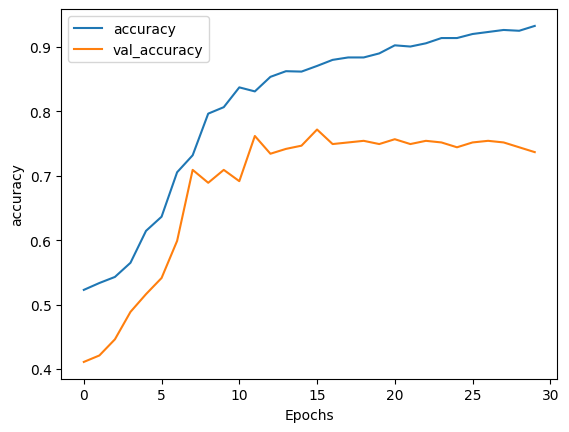

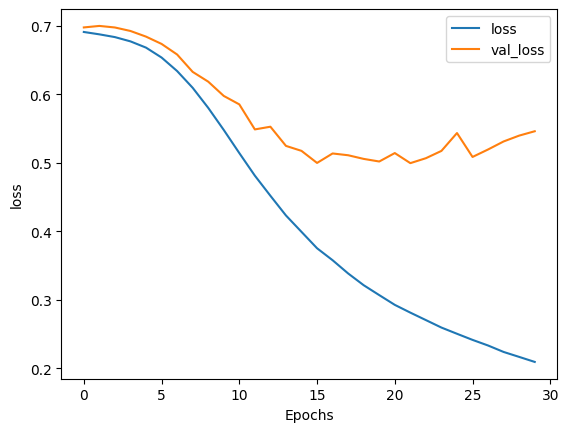

In [71]:
def plot_graphs(hist, string):
    val_string = f"val_{string}"
    
    plt.plot(hist.history[string])
    plt.plot(hist.history[val_string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, val_string])
    plt.show()
    
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')